In [1]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 1
Problem 2
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 1\nProblem 2\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
SS = StandardScaler()
MM = MinMaxScaler()

In [3]:
#create pandas dataframe and print first 5 rows
df = pd.read_csv("Housing.csv")
df_copy = df.copy()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#categorical inputs that need to be mapped to numbers
non_num_varlist = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

#mapping function
def to_num(x):
    return x.map({"yes": 1, "no": 0})

In [5]:
#map inputs and output new dataframe
df[non_num_varlist] = df_copy[non_num_varlist].apply(to_num) #copy df is to avoid problems if you run cell again
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
#train/test split, random_state functions as seed
df_train, df_test = train_test_split(df, train_size=.8, test_size=.2, random_state=7)

In [7]:
#create arrays of relevent inputs for this problem

#part a
vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
train_set = df_train[vars]
test_set = df_test[vars]



#part b
vars_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
train_set_b = df_train[vars_b]
test_set_b = df_test[vars_b]

In [8]:
#scale two different ways

#part a
ss_train_set = SS.fit_transform(train_set)
ss_test_set = SS.fit_transform(test_set)
mm_train_set = MM.fit_transform(train_set)
mm_test_set = MM.fit_transform(test_set)


#part b
ss_train_set_b = SS.fit_transform(train_set_b)
ss_test_set_b = SS.fit_transform(test_set_b)
mm_train_set_b = MM.fit_transform(train_set_b)
mm_test_set_b = MM.fit_transform(test_set_b)

In [9]:
#create variables for test and train set since they are different sizes

m_train = len(train_set)
m_test = len(test_set)

#standard scaler train
ss_Y_train = ss_train_set[:,-1]
ss_x_train = ss_train_set[:,0:6]
ss_x_0_train = np.ones((m_train,1))
ss_X_train = np.hstack((ss_x_0_train, ss_x_train))

#standard scaler test
ss_Y_test = ss_test_set[:,-1]
ss_x_test = ss_test_set[:, 0:6]
ss_x_0_test = np.ones((m_test,1))
ss_X_test = np.hstack((ss_x_0_test, ss_x_test))

#min max train
mm_Y_train = mm_train_set[:,-1]
mm_x_train = mm_train_set[:,0:6]
mm_x_0_train = np.ones((m_train,1))
mm_X_train = np.hstack((mm_x_0_train, mm_x_train))

#Min max test
mm_Y_test = mm_test_set[:,-1]
mm_x_test = mm_test_set[:, 0:6]
mm_x_0_test = np.ones((m_test,1))
mm_X_test = np.hstack((mm_x_0_test, mm_x_test))

In [10]:
#same thing but for part b

m_train_b = len(train_set_b)
m_test_b = len(test_set_b)

#standard scaler train
ss_Y_train_b = ss_train_set_b[:,-1]
ss_x_train_b = ss_train_set_b[:,0:12]
ss_x_0_train_b = np.ones((m_train_b,1))
ss_X_train_b = np.hstack((ss_x_0_train_b, ss_x_train_b))

#standard scaler test
ss_Y_test_b = ss_test_set_b[:,-1]
ss_x_test_b = ss_test_set_b[:, 0:12]
ss_x_0_test_b = np.ones((m_test_b,1))
ss_X_test_b = np.hstack((ss_x_0_test_b, ss_x_test_b))

#min max train
mm_Y_train_b = mm_train_set_b[:,-1]
mm_x_train_b = mm_train_set_b[:,0:12]
mm_x_0_train_b = np.ones((m_train_b,1))
mm_X_train_b = np.hstack((mm_x_0_train_b, mm_x_train_b))

#Min max test
mm_Y_test_b = mm_test_set_b[:,-1]
mm_x_test_b = mm_test_set_b[:, 0:12]
mm_x_0_test_b = np.ones((m_test_b,1))
mm_X_test_b = np.hstack((mm_x_0_test_b, mm_x_test_b))

In [11]:
#initialize theta, # of iterations, and learning rate

#part a
iterations = 5000
ss_theta = np.zeros(7)
ss_alpha = .007

mm_theta = np.zeros(7)
mm_alpha = .02



#part b
iterations_b = 5000
ss_theta_b = np.zeros(13)
ss_alpha_b = .008

mm_theta_b = np.zeros(13)
mm_alpha_b = .01

In [12]:
#initialize cost history arrays
ss_train_cost_history = np.zeros(iterations)
ss_test_cost_history = np.zeros(iterations)
mm_train_cost_history = np.zeros(iterations)
mm_test_cost_history = np.zeros(iterations)


ss_train_cost_history_b = np.zeros(iterations_b)
ss_test_cost_history_b = np.zeros(iterations_b)
mm_train_cost_history_b = np.zeros(iterations_b)
mm_test_cost_history_b = np.zeros(iterations_b)

In [13]:
#loss function
def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = (1/(2*m))*np.sum(sqrErrors)
    
    return J

In [14]:
#gradient descent function
def gradient_descent(x_train, y_train, x_test, y_test, theta, alpha, iterations, m_train, m_test, train_cost_history, test_cost_history):
    
    for i in range(iterations):
        predictions = x_train.dot(theta)
        errors = np.subtract(predictions, y_train)
        sum_delta = (alpha/m_train) * x_train.transpose().dot(errors)
        theta -= sum_delta
        train_cost_history[i] = compute_cost(x_train, y_train, theta, m_train)
        test_cost_history[i] = compute_cost(x_test, y_test, theta, m_test)
    
    return theta, train_cost_history, test_cost_history

In [15]:
#part a
#standard scaler
ss_theta, ss_train_cost_history, ss_test_cost_history = gradient_descent(ss_X_train, ss_Y_train, ss_X_test, ss_Y_test, ss_theta, ss_alpha, iterations, m_train, m_test, ss_train_cost_history, ss_test_cost_history)
print("Final theta values for part a with standard scaler:", ss_theta)

#min max
mm_theta, mm_train_cost_history, mm_test_cost_history = gradient_descent(mm_X_train, mm_Y_train, mm_X_test, mm_Y_test, mm_theta, mm_alpha, iterations, m_train, m_test, mm_train_cost_history, mm_test_cost_history)
print("Final theta values for part b with minmax:", mm_theta)




#part b
#standard scaler
ss_theta_b, ss_train_cost_history_b, ss_test_cost_history_b = gradient_descent(ss_X_train_b, ss_Y_train_b, ss_X_test_b, ss_Y_test_b, ss_theta_b, ss_alpha_b, iterations_b, m_train_b, m_test_b, ss_train_cost_history_b, ss_test_cost_history_b)
print("Final theta values for part b with standard scaler:", ss_theta_b)

#min max
mm_theta_b, mm_train_cost_history_b, mm_test_cost_history_b = gradient_descent(mm_X_train_b, mm_Y_train_b, mm_X_test_b, mm_Y_test_b, mm_theta_b, mm_alpha_b, iterations_b, m_train_b, m_test_b, mm_train_cost_history_b, mm_test_cost_history_b)
print("Final theta values for part b with min max:", mm_theta_b)

Final theta values for part a with standard scaler: [-4.72771828e-20  1.12351149e-05 -4.84537701e-07  7.27780521e-06
  6.20567530e-06  2.32650360e-06  9.99981110e-01]
Final theta values for part b with minmax: [0.00838029 0.16316443 0.01669635 0.10224781 0.03778532 0.02172851
 0.70713697]
Final theta values for part b with standard scaler: [ 1.94320859e-20  2.69741133e-05 -1.27098553e-06  1.87099601e-05
  1.71087158e-05  3.95243867e-06  6.74271467e-07  1.19610925e-05
  7.55458785e-06  1.48000892e-05  6.34568738e-06  7.77046715e-06
  9.99939500e-01]
Final theta values for part b with min max: [0.00113923 0.15466597 0.04161337 0.13525179 0.06932388 0.02518074
 0.0168478  0.02061116 0.04479379 0.0443654  0.05546357 0.03330798
 0.43042142]


Standard scaler training cost: 8.603522950138437e-11
Standard scaler testing cost: 9.390932165456731e-11


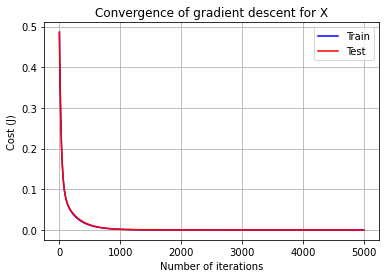

In [16]:
#plot standard scaler train and test loss vs iterations for part a
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(range(1, iterations + 1), ss_train_cost_history, color='blue', label='Train')
plt.plot(range(1, iterations + 1), ss_test_cost_history, color='red', label='Test')
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X')
print("Standard scaler training cost:", ss_train_cost_history[-1])
print("Standard scaler testing cost:", ss_test_cost_history[-1])

Min max training cost: 0.0005081286497741986
Min max testing cost: 0.0007631190873710804


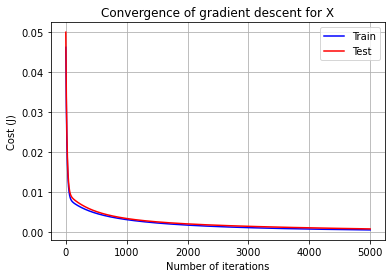

In [17]:
#plot min max train and test loss vs iterations for part a
plt.plot(range(1, iterations + 1), mm_train_cost_history, color='blue', label='Train')
plt.plot(range(1, iterations + 1), mm_test_cost_history, color='red', label='Test')
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X')
print("Min max training cost:", mm_train_cost_history[-1])
print("Min max testing cost:", mm_test_cost_history[-1])

Standard scaler training cost part b: 6.462262312601764e-10
Standard scaler testing cost part b: 7.131091466141552e-10


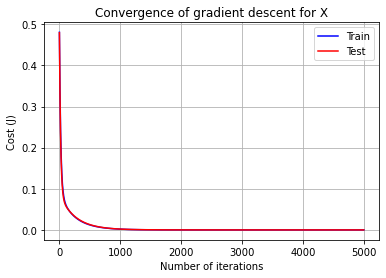

In [18]:
#plot standard scaler train and test loss vs iterations for part b
plt.plot(range(1, iterations_b + 1), ss_train_cost_history_b, color='blue', label='Train')
plt.plot(range(1, iterations_b + 1), ss_test_cost_history_b, color='red', label='Test')
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X')
print("Standard scaler training cost part b:", ss_train_cost_history_b[-1])
print("Standard scaler testing cost part b:", ss_test_cost_history_b[-1])

Min max training cost part b: 0.001434780826566402
Min max testing cost part b: 0.0015886939687538653


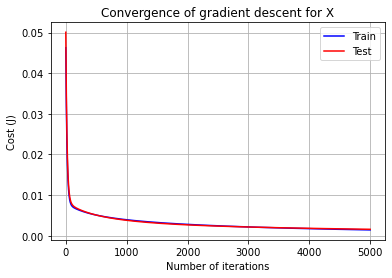

In [19]:
#plot min max train and test loss vs iterations for part b
plt.plot(range(1, iterations_b + 1), mm_train_cost_history_b, color='blue', label='Train')
plt.plot(range(1, iterations_b + 1), mm_test_cost_history_b, color='red', label='Test')
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X')
print("Min max training cost part b:", mm_train_cost_history_b[-1])
print("Min max testing cost part b:", mm_test_cost_history_b[-1])